
Assignment 3 - 10/17/2019
Name: Carolina Carvalho Manhaes Leite
NetID: leite2

------------

1) The dataset has 2721 rows and 37 columns.

2) Features names:

CUSIP
Ticker
Issue Date
Maturity
1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Coupon
Issued Amount
Maturity Type
Coupon Type
Maturity At Issue months
Industry
LiquidityScore
Months in JNK
Months in HYG
Months in Both
IN_ETF
LIQ SCORE
n_trades
volume_trades
total_median_size
total_mean_size
n_days_trade
days_diff_max
percent_intra_dealer
percent_uncapped
bond_type
Client_Trade_Percentage
weekly_mean_volume
weekly_median_volume
weekly_max_volume
weekly_min_volume
weekly_mean_ntrades
weekly_median_ntrades

3) Descriptive Statistics

The Rating Bloomberg (modified) has 2721 rows and the following domain:

1     139
2    1230
3     171
4       4
5    1177
Name: Rating_Bloomberg, dtype: int64

--

count          2721
unique         2721
top       629377AX0
freq              1
Name: CUSIP, dtype: object
 
--

count    

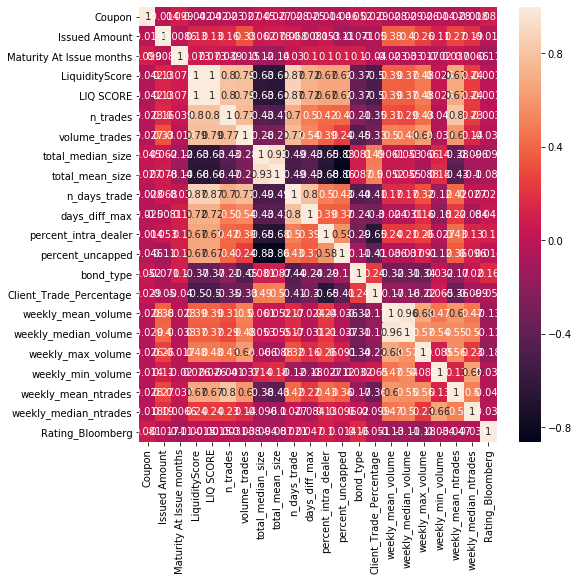


------------

5) Scatterplot Matrices



<Figure size 432x288 with 0 Axes>

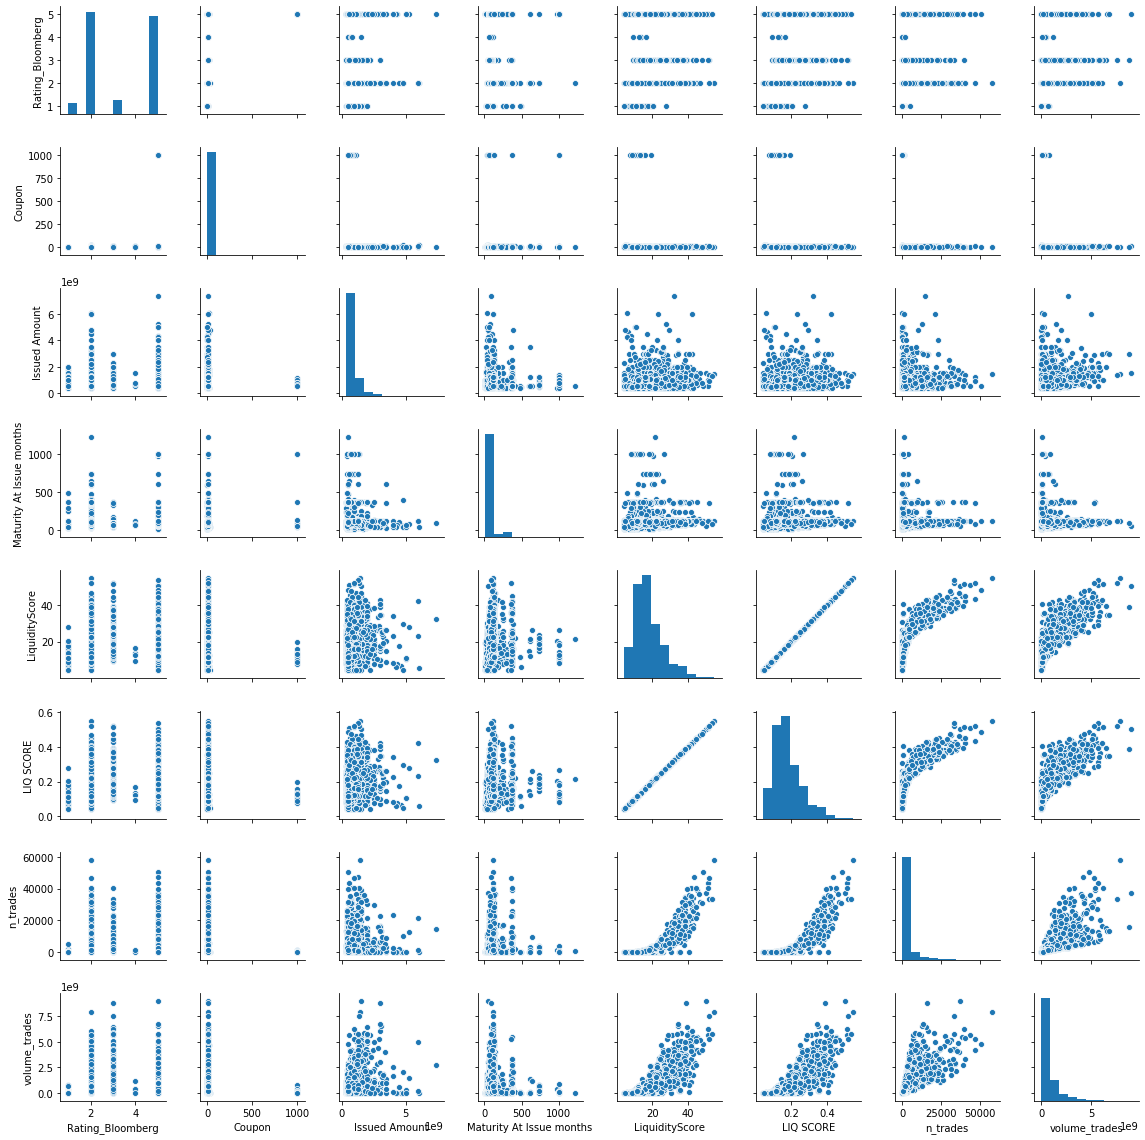

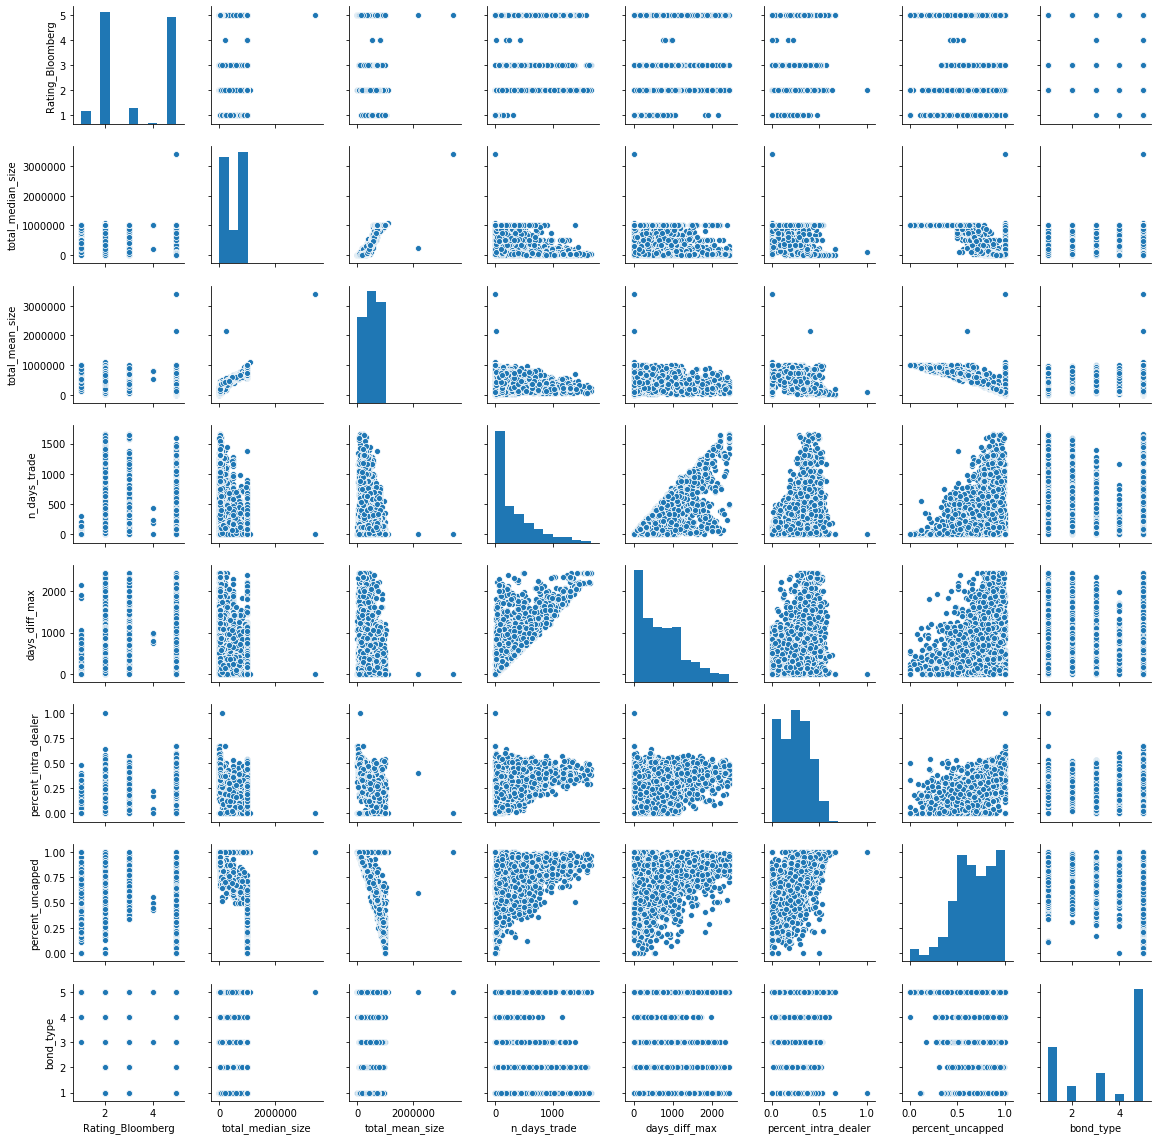

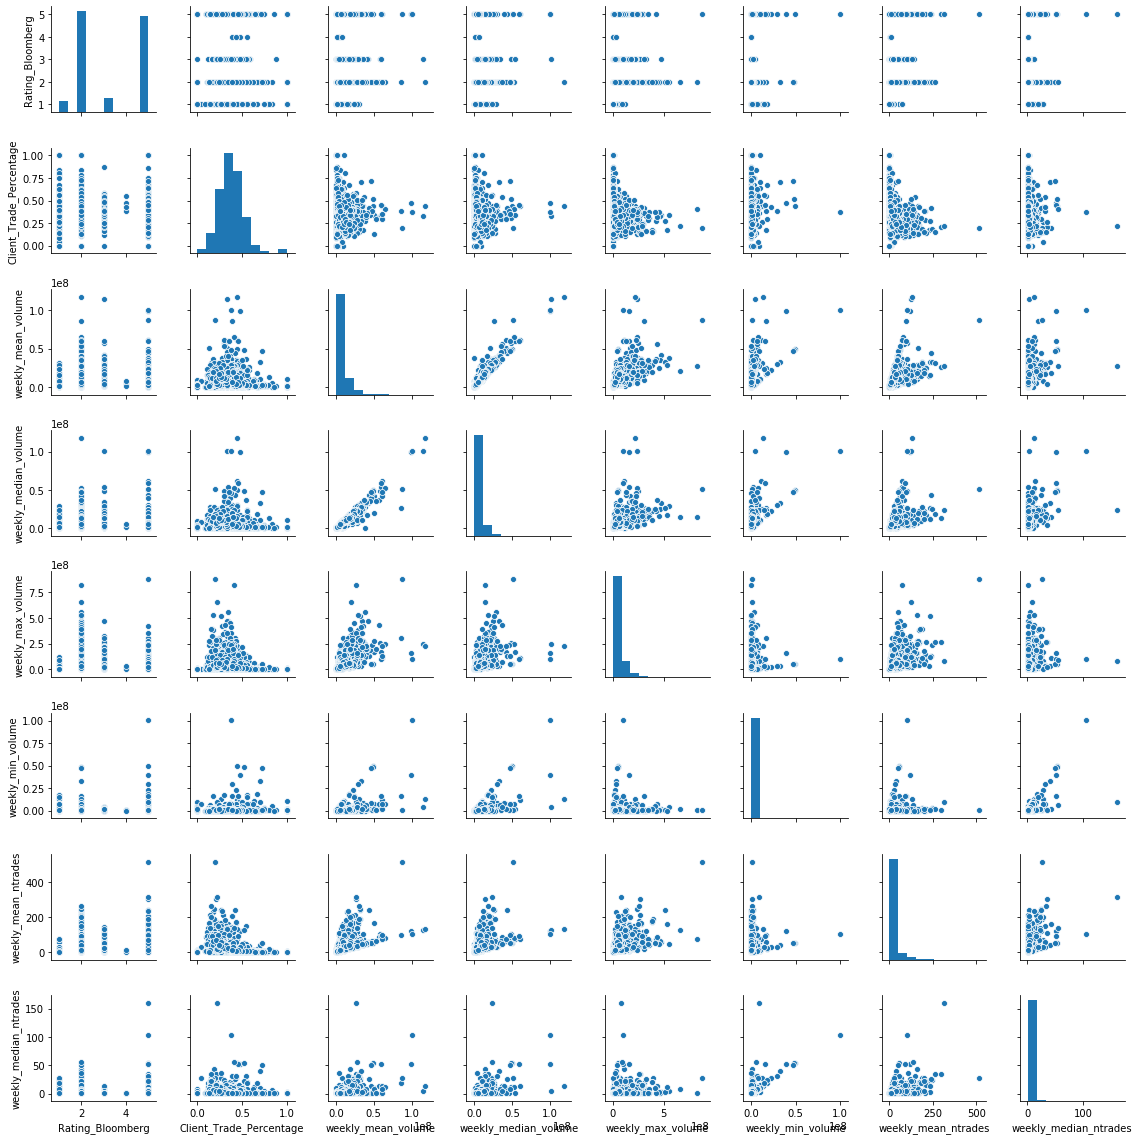

 

My name is Carolina Carvalho Manhaes Leite
My NetID is: leite2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [16]:
print ("\nAssignment 3 - 10/17/2019")
print("Name: Carolina Carvalho Manhaes Leite")
print("NetID: leite2")
print("\n------------\n")

# IMPORTING LIBRARIES #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from datetime import date

# IMPORTING AND MANIPULATING THE DATA #

# Import csv file
df = pd.read_csv('/Users/carolinacmleite/Desktop/xid-46208489_1.csv',header=0)

# Display the shape (#rows and #columns)
print('1) The dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.\n')

# Display the features names 
print("2) Features names:\n")
w, h = 2, 37;
summarize_table = [[0 for x in range(w)] for y in range(h)] 

columns_names = df.columns;
for i in range(len((columns_names))):
    summarize_table[i][0]=columns_names[i]
    summarize_table[i][1]=type(columns_names[i])
    
for i in range(len((columns_names))):
    print (summarize_table[i][0])
print("")

# Creating a new column with a new multiclass target. We're clustering:
# AAA's, AA's, A's / BBB's, BB's, B's / CCC's, CC's, C's / DDD's, DD's / Others
conditions = [
    (df['Bloomberg Composite Rating'] == 'AAA') | (df['Bloomberg Composite Rating'] == 'AA+') | (df['Bloomberg Composite Rating'] == 'AA') | (df['Bloomberg Composite Rating'] == 'A+') | (df['Bloomberg Composite Rating'] == 'A') | (df['Bloomberg Composite Rating'] == 'A-') | (df['Bloomberg Composite Rating'] == 'AA-'),
    (df['Bloomberg Composite Rating'] == 'B+') | (df['Bloomberg Composite Rating'] == 'B') | (df['Bloomberg Composite Rating'] == 'B-') | (df['Bloomberg Composite Rating'] == 'BB+') | (df['Bloomberg Composite Rating'] == 'BB') | (df['Bloomberg Composite Rating'] == 'BB-') | (df['Bloomberg Composite Rating'] == 'BBB+') | (df['Bloomberg Composite Rating'] == 'BBB') | (df['Bloomberg Composite Rating'] == 'BBB-'),
    (df['Bloomberg Composite Rating'] == 'C+') | (df['Bloomberg Composite Rating'] == 'C') | (df['Bloomberg Composite Rating'] == 'CC+') | (df['Bloomberg Composite Rating'] == 'CC') | (df['Bloomberg Composite Rating'] == 'CC-') | (df['Bloomberg Composite Rating'] == 'CCC+') | (df['Bloomberg Composite Rating'] == 'CCC') | (df['Bloomberg Composite Rating'] == 'CCC-'),
    (df['Bloomberg Composite Rating'] == 'DD+') | (df['Bloomberg Composite Rating'] == 'DDD'),
    (df['Bloomberg Composite Rating'] == 'NR') | (df['Bloomberg Composite Rating'] == 'Nan')
             ]
#choices = ['01 - AAA/AA/A', '02 - BBB/BB/B', '03 - CCC/CC/C', '04 - DDD/DD', '05 - Others']
choices = [1,2,3,4,5]
df['Rating_Bloomberg'] = np.select(conditions, choices)

#conditions = [(df['Coupon'] == 999)]
#choices = [1]
#df['Coupon'] = np.select(conditions, choices)

print("3) Descriptive Statistics\n")

y_blb = df['Rating_Bloomberg'] # Extracting Rating_Bloomberg
print('The Rating Bloomberg (modified) has ' + str(y_blb.shape[0]) + ' rows and the following domain:\n')
print(y_blb.value_counts(dropna = False).sort_index()) 
print("\n--\n")

# DESCRIPTIVE STATISTICS #

# DS of Feature Variables
for x in range(0, 37):
    lastvar = df[df.columns[x]]
    print (lastvar.describe())
    print(" ")
    print("--\n")
print("------------\n")

# Heatmap of correlations
corr = df.corr()
#corr = corr.iloc[:, :-1]
print ("4) Heat Map of Correlations\n")
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
plt.show()
plt.clf()
print("\n------------\n")

print ("5) Scatterplot Matrices\n")

# Scatterplot Matrices
cols_num = [
           'Rating_Bloomberg', 'Coupon', 'Issued Amount', 'Maturity At Issue months', 'LiquidityScore', 'LIQ SCORE', 'n_trades','volume_trades'
           ]
sns.pairplot(df[cols_num], height=2)
plt.show()
print(" ")
cols_num = [
          'Rating_Bloomberg', 'total_median_size', 'total_mean_size', 'n_days_trade', 'days_diff_max' ,'percent_intra_dealer','percent_uncapped', 'bond_type'
           ]
sns.pairplot(df[cols_num], height=2)
plt.show()
print(" ")
cols_num = [
            'Rating_Bloomberg', 'Client_Trade_Percentage','weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume','weekly_mean_ntrades', 'weekly_median_ntrades'
           ]
sns.pairplot(df[cols_num], height=2)
plt.show()
print(" ")

print("")
print("My name is Carolina Carvalho Manhaes Leite")
print("My NetID is: leite2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")


